# **ML Assignment 01 – Sahil’s Wildlife Rescue Classification Challenge**

## student Name : Fatima Nawab

Sahil runs a small wildlife rescue centre. Whenever an injured bird is brought in, the staff record details about it like species, weight, habitat, injury type, etc. He now wants to build a simple Machine Learning model that predicts whether a rescued bird will recover or not within two weeks.

You have been hired as a Data Science Assistant at Sahil’s Wildlife Care to help automate this process using the techniques you learned in class.

**Dataset:** sahil_wildlife_recovery.csv

The dataset contains 1,000 records, each representing a rescued bird.
Each row includes various features related to the bird’s condition and background.

| Column Name          | Description                                                                             |
| -------------------- | --------------------------------------------------------------------------------------- |
| `bird_id`            | Unique ID for each bird                                                                 |
| `species`            | Type of bird (e.g., Sparrow, Parrot, Falcon, Crow, Pigeon)                              |
| `age_group`          | Age group (Chick, Juvenile, Adult)                                                      |
| `weight`             | Weight in grams                                                                         |
| `injury_type`        | Main injury (Wing Fracture, Leg Injury, Dehydration, Poisoning, Minor Cut, Head Trauma) |
| `habitat_region`     | Area bird was rescued from (Urban, Forest, Desert, Coastal)                             |
| `arrival_day`        | Day of the week it arrived                                                              |
| `received_treatment` | Whether treatment was administered on the first day (Yes/No)                            |
| `hours_in_care`      | Total hours spent under care so far                                                     |
| `recovered`          | **Target variable** — whether the bird recovered within 14 days (Yes/No)                |

You will use classification algorithms to predict `recovered`.

##Importing all necessary libraries

In [ ]:
# Data manipulation
import pandas as pd  # for working with tabular data
import numpy as np   # for numerical operations

# Visualization
import matplotlib.pyplot as plt   # for plotting basic graphs
import seaborn as sns             # for more advanced and prettier visualizations

# Machine Learning (from scikit-learn)
from sklearn.model_selection import train_test_split     # for splitting data into train and test sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # for scaling numeric data and encoding categorical data
from sklearn.compose import ColumnTransformer            # for applying different preprocessing steps to different columns
from sklearn.pipeline import Pipeline                    # for building workflows that combine preprocessing + models

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Display settings for pandas
pd.set_option("display.max_columns", None)  # Show all columns when viewing a DataFrame


## **Step 1 – Exploring the Dataset (10 marks)**

Load the dataset and display the first 10 rows to get an overview (2 marks)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/Book1.csv")
data.head(10)

,bird_id,species,age_group,weight,injury_type,habitat_region,arrival_day,received_treatme,hours_in_care,recovered
0,B001,Sparrow,Adult,45,Minor Cut,Urban,Monday,Yes,72,Yes
1,B002,Parrot,Juvenile,95,Wing Fracture,Forest,Tuesday,Yes,168,Yes
2,B003,Crow,Adult,120,Dehydration,Urban,Wednesday,No,24,No
3,B004,Falcon,Adult,980,Leg Injury,Desert,Thursday,Yes,210,Yes
4,B005,Pigeon,Juvenile,320,Minor Cut,Urban,Friday,Yes,60,Yes
5,B006,Sparrow,Chick,30,Poisoning,Urban,Saturday,No,36,No
6,B007,Parrot,Adult,105,Head Trauma,Forest,Sunday,Yes,192,No
7,B008,Crow,Juvenile,150,Dehydration,Coastal,Monday,Yes,84,Yes
8,B009,Falcon,Adult,1100,Leg Injury,Desert,Tuesday,Yes,240,Yes
9,B010,Pigeon,Chick,280,Wing Fracture,Urban,Wednesday,No,48,No


Check basic information and shape of the dataset (2 marks)

In [ ]:
# Shape of the dataset
print("Dataset shape (rows, columns):", data.shape)

# Info: column names, data types, non-null counts
print("\nDataset info:")
print(data.info())

# Count how many cells have the string " ?"
print("\nMissing (encoded as '?') values per column:")
for col in data.columns:
    print(f"{col}: {(data[col] == ' ?').sum()}")

# Summary statistics of numerical columns
print("\nSummary statistics of numerical features:")
display(data.describe())

Dataset shape (rows, columns): (1000, 10)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bird_id           1000 non-null   object
 1   species           1000 non-null   object
 2   age_group         1000 non-null   object
 3   weight            1000 non-null   int64 
 4   injury_type       1000 non-null   object
 5   habitat_region    1000 non-null   object
 6   arrival_day       1000 non-null   object
 7   received_treatme  1000 non-null   object
 8   hours_in_care     1000 non-null   int64 
 9   recovered         1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB
None

Missing (encoded as '?') values per column:
bird_id: 0
species: 0
age_group: 0
weight: 0
injury_type: 0
habitat_region: 0
arrival_day: 0
received_treatme: 0
hours_in_care: 0
recovered: 0

Summary statistics of numerical features

,weight,hours_in_care
count,1000.000000,1000.000000
mean,308.257000,131.470000
std,344.652344,53.795251
min,28.000000,18.000000
25%,74.000000,96.000000
50%,130.000000,132.000000
75%,315.000000,168.000000
max,1100.000000,240.000000


Check for missing values and duplicates in the dataset (3 marks)

In [ ]:
# Check missing values (actual NaNs)
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
bird_id             0
species             0
age_group           0
weight              0
injury_type         0
habitat_region      0
arrival_day         0
received_treatme    0
hours_in_care       0
recovered           0
dtype: int64


In [ ]:
# checking for duplicates values
print("\n duplicate values:")
data.duplicated().sum()


 duplicate values:


np.int64(0)

In [ ]:
# Display all duplicate rows
data[data.duplicated()]

,bird_id,species,age_group,weight,injury_type,habitat_region,arrival_day,received_treatme,hours_in_care,recovered


Show the unique values in the target column `recovered` and count how many birds recovered and how many did not (3 marks)

In [ ]:
# Show unique values in the target column
data['recovered'].unique()


array(['Yes', 'No'], dtype=object)

In [ ]:
# Count the number of each category
data['recovered'].value_counts()


,count
recovered,
Yes,868
No,132


## **Step 2 – Data Cleaning & Preprocessing (15 marks)**

Handle missing values if any, and remove duplicates if found (3 marks)

In [ ]:
# Check how many missing values each column has
data.isnull().sum()


,0
bird_id,0
species,0
age_group,0
weight,0
injury_type,0
habitat_region,0
arrival_day,0
received_treatme,0
hours_in_care,0
recovered,0


In [ ]:
# Check how many duplicate rows exist
data.duplicated().sum()


np.int64(0)

Encode the categorical columns using One-Hot Encoding (4 marks)

In [ ]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=["object"]).columns
categorical_cols

Index(['bird_id', 'species', 'age_group', 'injury_type', 'habitat_region',
       'arrival_day', 'received_treatme', 'recovered'],
      dtype='object')

In [ ]:
# Step 1: Define transformers
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Step 2: Create a ColumnTransformer
# - Apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_cols)  # categorical pipeline
    ]
)
print("categorical columns will be one-hot encoded.")

categorical columns will be one-hot encoded.


In [ ]:
preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['bird_id', 'species', 'age_group', 'injury_type', 'habitat_region',
       'arrival_day', 'received_treatme', 'recovered'],
      dtype='object'))])

Scale numeric columns using StandardScaler (4 marks)

In [ ]:
# Identify numeric columns (int or float datatypes)
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns
numeric_cols

Index(['weight', 'hours_in_care'], dtype='object')

In [ ]:
# Step 1: Define transformers
numeric_transformer = StandardScaler()   # scales numerical features

# Step 2: Create a ColumnTransformer
# - Apply StandardScaler to numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols), ]
    )
print("✅ Preprocessing pipeline created (scaling + encoding).")

✅ Preprocessing pipeline created (scaling + encoding).


In [ ]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['weight', 'hours_in_care'], dtype='object'))])

Split the dataset into 80% train and 20% test sets (4 marks)

In [ ]:
# firts seperating and defining featurea (X) and target (Y)
X = data.drop(columns=["recovered"])   # All columns except "recovered"
y = data["recovered"]                  # Only the "recovered" column

# Print shapes to confirm
print("Features shape (X):", X.shape)   # rows, columns of inputs
print("Target shape (y):", y.shape)     # rows, columns of outputs

Features shape (X): (1000, 9)
Target shape (y): (1000,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# Arguments:
# - X : features (input variables)
# - y : target (output variable, recovered)
# - test_size=0.2 : 20% of the data will be used as the test set
# - random_state=42 : random seed for reproducibility (ensures same split every time)



X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Let's inspect the shapes
print("Feature matrix for TRAINING (X_train):", X_train.shape)
print("Target vector for TRAINING (y_train):", y_train.shape)
print("Feature matrix for TESTING (X_test):", X_test.shape)
print("Target vector for TESTING (y_test):", y_test.shape)

# Double-check the distribution of target classes
print("\nClass distribution in TRAINING set:")
print(y_train.value_counts(normalize=True) * 100)

print("\nClass distribution in TESTING set:")
print(y_test.value_counts(normalize=True) * 100)

Feature matrix for TRAINING (X_train): (800, 9)
Target vector for TRAINING (y_train): (800,)
Feature matrix for TESTING (X_test): (200, 9)
Target vector for TESTING (y_test): (200,)

Class distribution in TRAINING set:
recovered
Yes    86.75
No     13.25
Name: proportion, dtype: float64

Class distribution in TESTING set:
recovered
Yes    87.0
No     13.0
Name: proportion, dtype: float64


## **Step 3 – Model Training & Evaluation (20 marks)**

##Train a Logistic Regression model and print accuracy, precision, recall, and F1 scores (5 marks)

✅ Logistic Regression Evaluation Metrics:
Accuracy : 0.9950
Precision: 0.9950
Recall   : 0.9950
F1 Score : 0.9950


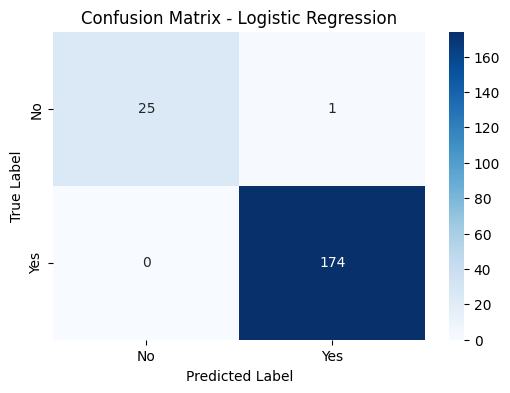

In [ ]:
# Step 1: Import necessary modules
from sklearn.linear_model import LogisticRegression   # Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Build a pipeline
log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Step 3: Train the model
log_reg_pipeline.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = log_reg_pipeline.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("✅ Logistic Regression Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],   # predicted labels
            yticklabels=["No", "Yes"])   # actual labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


##Train a Decision Tree Classifier and print the same metrics (5 marks)

✅ Decision Tree Evaluation Metrics:
Accuracy : 0.9900
Precision: 0.9900
Recall   : 0.9900
F1 Score : 0.9900


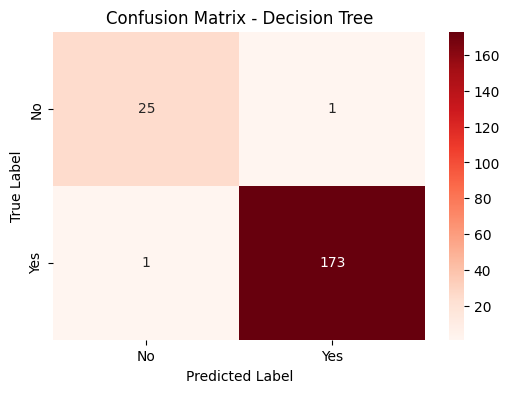

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Step 1: Build a pipeline
# - Preprocessor: scales numeric features + one-hot encodes categorical features
# - Classifier: Decision Tree
#   - max_depth=5: limits the depth of the tree (to prevent overfitting)
#   - random_state=42: ensures reproducibility
tree_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Step 2: Train the model on the training set
# - X_train goes through preprocessing first
# - Then the Decision Tree learns patterns between features and target
tree_pipeline.fit(X_train, y_train)

# Step 3: Make predictions on the test set
# - X_test is preprocessed (same transformations as training data)
# - The trained tree makes predictions for each row
y_pred_tree = tree_pipeline.predict(X_test)

# Step 4: Evaluate the model
# Accuracy: percentage of correctly classified samples
acc_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average="weighted")
recall_tree = recall_score(y_test, y_pred_tree, average="weighted")
f1_tree = f1_score(y_test, y_pred_tree, average="weighted")

print("✅ Decision Tree Evaluation Metrics:")
print(f"Accuracy : {acc_tree:.4f}")
print(f"Precision: {precision_tree:.4f}")
print(f"Recall   : {recall_tree:.4f}")
print(f"F1 Score : {f1_tree:.4f}")

# Step 5: Confusion Matrix
# Rows = Actual labels, Columns = Predicted labels
# Helps us see where the model is getting confused
cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Reds",
            xticklabels=["No", "Yes"],   # Predicted categories
            yticklabels=["No", "Yes"])   # Actual categories
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


##Train a Random Forest Classifier and print the same metrics (5 marks)

✅ Random Forest Evaluation Metrics:
Accuracy : 0.9950
Precision: 0.9950
Recall   : 0.9950
F1 Score : 0.9950


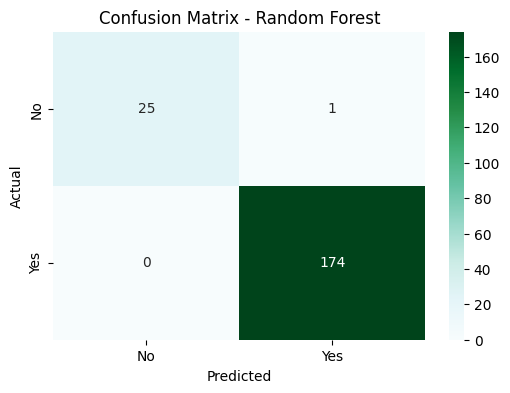

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Build pipeline with preprocessing + Random Forest
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=100,        # number of trees in the forest
        random_state=42,
        n_jobs=-1                # use all CPU cores for speed
    ))
])

# Step 2: Train the Random Forest
rf_pipeline.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_rf = rf_pipeline.predict(X_test)

# Step 4: Evaluate performance (overall metrics)
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average="weighted")
recall_rf = recall_score(y_test, y_pred_rf, average="weighted")
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

print("✅ Random Forest Evaluation Metrics:")
print(f"Accuracy : {acc_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall   : {recall_rf:.4f}")
print(f"F1 Score : {f1_rf:.4f}")

# Step 5: Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="BuGn",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

##Create a table showing accuracy, precision, recall, and F1 for all three models (5 marks)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# Collect performance metrics for all models

# Helper function to calculate metrics
def get_metrics(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, pos_label="Yes"),
        "Recall": recall_score(y_true, y_pred, pos_label="Yes"),
        "F1-Score": f1_score(y_true, y_pred, pos_label="Yes")
    }

# Gather results
results = []

# Logistic Regression
results.append(get_metrics(y_test, y_pred, "Logistic Regression"))

# Decision Tree
results.append(get_metrics(y_test, y_pred_tree, "Decision Tree"))

# Random Forest
results.append(get_metrics(y_test, y_pred_rf, "Random Forest"))

# Convert to DataFrame for display
results_df = pd.DataFrame(results)

# Display comparison table
print("✅ Model Performance Comparison")
display(results_df)


✅ Model Performance Comparison


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.995,0.994286,1.000000,0.997135
1,Decision Tree,0.990,0.994253,0.994253,0.994253
2,Random Forest,0.995,0.994286,1.000000,0.997135


## **Step 4 – Model Comparison & Insights (10 marks)**

Plot a bar chart comparing the accuracy scores of the three models (5 marks)

/tmp/ipython-input-1475556441.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Blues_d")


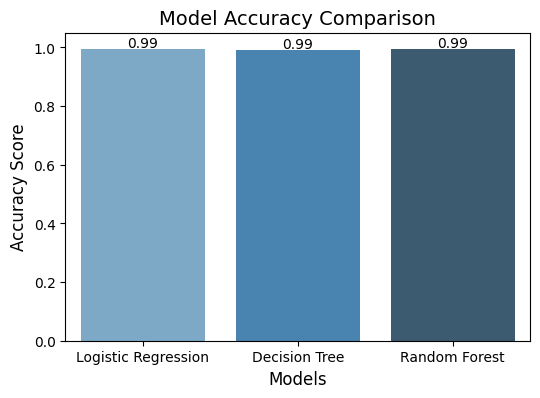

In [ ]:
# Set the plot style
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Blues_d")

# Add chart labels and title
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)

# Display the exact accuracy value on each bar
for index, row in results_df.iterrows():
    plt.text(index, row["Accuracy"] + 0.005, f"{row['Accuracy']:.2f}",
             ha='center', fontsize=10, color='black')

plt.ylim(0, 1.05)  # keep scale from 0 to 1
plt.show()


##Q.1 Which model performed best and why? Explain briefly in 2–3 sentences (5 marks)

## **answer**

Both the Logistic Regression and Random Forest models achieved the highest accuracy of 99.5%, outperforming the Decision Tree model (99.0%).
However, Logistic Regression is slightly preferred because it provides equally high precision, perfect recall, and simpler interpretability compared to Random Forest.
This means it accurately predicts bird recovery outcomes with minimal complexity and excellent reliability.

## **Step 5 – Interpretation & Conclusion (5 marks)**

#Q.2 Do you notice any class imbalance in the target variable? If yes, how might it affect the results? (2 marks)

##**answer**

Yes, there is a class imbalance in the target variable — around 87% of birds recovered, while only 13% did not.
This imbalance can make the model biased toward predicting “Yes” (recovered) more often, since that class dominates the data. As a result, the model may achieve high accuracy but perform poorly in detecting the “No” (not recovered) cases, which are fewer but equally important for real-world decision-making.

##Q.3 Write 2–3 lines summarizing what you learned from this assignment and how you would improve the model next time (3 marks)

##**answer**

From this assignment, I learned the practical workflow of machine learning, including data preprocessing, model building, and evaluation. I also understood how different models perform and how to interpret their results. I can further improve by practicing more on different datasets, exploring other machine learning models, and gaining hands-on experience through more real-world projects to strengthen my understanding.
This dataset was mostly cleaned and had no null values no missing values so it was a bit simple one want to explore a bit more complex datasets in future.